In [156]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [143]:
df = pd.read_csv("dataset_for_ML.csv")
df.head()

,Amount,BankNameSent,BankNameReceived,RemainingBalance,City,Gender,TransactionType,Status,DeviceType,PaymentMethod,MerchantName,Purpose,CustomerAge,PaymentMode,Currency,Months,Days,Hours,Minutes
0,271.64,SBI Bank,HDFC Bank,5557.02,Delhi,Female,Transfer,Success,Tablet,Phone Number,Amazon,Food,21,Scheduled,USD,2,2,17,12
1,1064.63,ICICI Bank,SBI Bank,9753.32,Bangalore,Male,Payment,Success,Laptop,QR Code,Zomato,Travel,22,Instant,EUR,3,3,11,15
2,144.15,Axis Bank,Axis Bank,7597.35,Hyderabad,Female,Transfer,Success,Mobile,UPI ID,Swiggy,Bill Payment,23,Scheduled,GBP,4,4,21,29
3,612.89,HDFC Bank,ICICI Bank,2327.84,Mumbai,Male,Payment,Success,Tablet,Phone Number,IRCTC,Others,24,Instant,INR,5,5,6,27
4,743.32,SBI Bank,HDFC Bank,1136.84,Delhi,Female,Transfer,Failed,Laptop,QR Code,Flipkart,Shopping,25,Scheduled,USD,6,6,2,6


In [144]:
X = df.drop(columns="Purpose")
y = df["Purpose"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
print(f"Train Size : {X_train.shape}")
print(f"Test Size : {X_test.shape}")

Train Size : (14000, 18)
Test Size : (6000, 18)


In [145]:
cols = [
    "BankNameSent", 
    "BankNameReceived", 
    "City", 
    "Gender", 
    "TransactionType", 
    "Status", 
    "DeviceType", 
    "PaymentMethod", 
    "MerchantName", 
    "PaymentMode", 
    "Currency"
]

ohe = OneHotEncoder(handle_unknown="ignore", sparse_output=False)

# Fit-transform on X_train
X_train_ohe = pd.DataFrame(
    data=ohe.fit_transform(X_train[cols]),
    index=X_train.index,
    columns=ohe.get_feature_names_out(cols)
)
# Transform X_test
X_test_ohe = pd.DataFrame(
    data=ohe.transform(X_test[cols]),
    index=X_test.index,
    columns=ohe.get_feature_names_out(cols)
)

# Drop original categorical columns and concatenate OHE columns
X_train = pd.concat([X_train.drop(columns=cols), X_train_ohe], axis=1)
X_test = pd.concat([X_test.drop(columns=cols), X_test_ohe], axis=1)

print(f"X_train After Encoding : {X_train.shape}")
print(f"X_test After Encoding : {X_test.shape}")

X_train After Encoding : (14000, 42)
X_test After Encoding : (6000, 42)


In [146]:
lb = LabelEncoder()
y_train = lb.fit_transform(y_train)
y_test = lb.transform(y_test)

In [147]:
rfc = RandomForestClassifier(
    n_estimators=120, 
    max_depth=12, 
    min_samples_split=8, 
    min_samples_leaf=4, 
    max_features="sqrt")
rfc.fit(X_train, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",120
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",12
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",8
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",4
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric(y

C:\Users\Farzah\AppData\Local\Temp\ipykernel_9264\2547653343.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_features.values, y=top_10_features.index, palette='viridis')


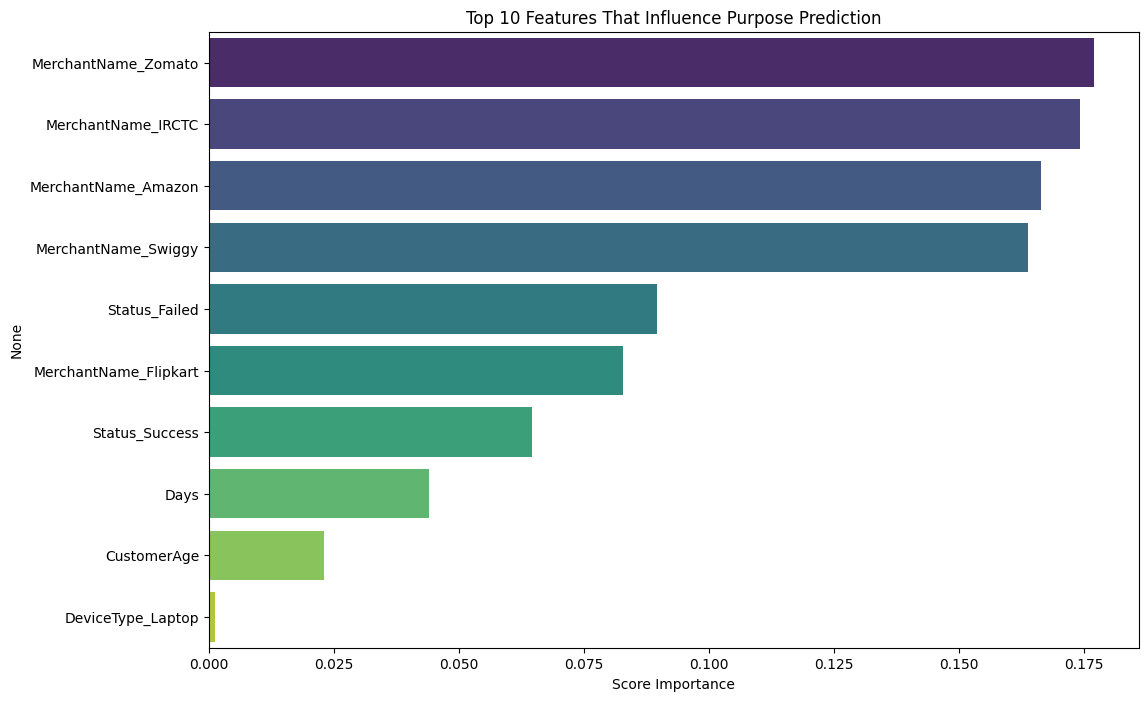

In [148]:
feature_importances = pd.Series(rfc.feature_importances_, index=X_train.columns)
top_10_features = feature_importances.nlargest(10)

plt.figure(figsize=(12, 8))
sns.barplot(x=top_10_features.values, y=top_10_features.index, palette='viridis')
plt.title('Top 10 Features That Influence Purpose Prediction')
plt.xlabel('Score Importance')
plt.show()

In [149]:
y_pred = rfc.predict(X_test)
print(f"Accuracy Score of X_test : {accuracy_score(y_test, y_pred)}")

Accuracy Score of X_test : 1.0


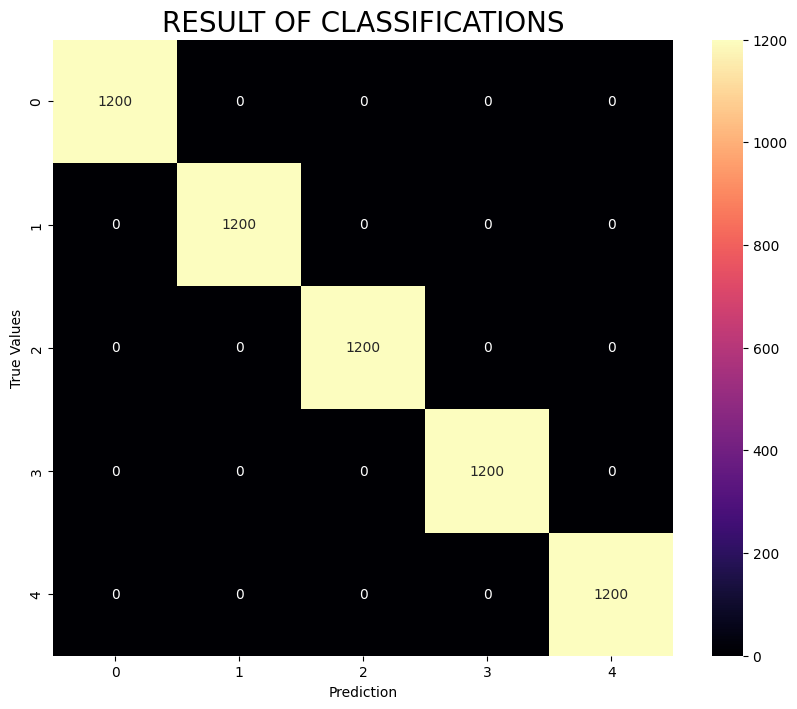


Classification Matrix :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1200
           1       1.00      1.00      1.00      1200
           2       1.00      1.00      1.00      1200
           3       1.00      1.00      1.00      1200
           4       1.00      1.00      1.00      1200

    accuracy                           1.00      6000
   macro avg       1.00      1.00      1.00      6000
weighted avg       1.00      1.00      1.00      6000



In [153]:
# Evaluation Model
matrix = confusion_matrix(y_test, y_pred.reshape(-1))

plt.figure(figsize=(10,8))
sns.heatmap(matrix, annot=True, fmt="d", cmap="magma")
plt.xlabel("Prediction")
plt.ylabel("True Values")
plt.title("Result of Classifications".upper(), fontsize=20)
plt.show()

report = classification_report(y_test, y_pred)
print(f"\nClassification Matrix :\n{report}")